<a href="https://colab.research.google.com/github/PietroMinaya/cc41_tf_201910362_201718387_201914478_201912855_20181A046/blob/main/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import graphviz as gv
import numpy as np
import pandas as pd
import heapq as hq
import numpy.random as npr
import matplotlib.pyplot as plt
import math
import csv

# Trabajo Final
## Integrantes:
- Pietro Minaya
- Dana Vallejos
- Raquel Chavez
- Adrian Chavez
- Bryan Vela

## Hito 3 y 4

## Algoritmo de Pietro Minaya (Prim) O (n^2)

---


- El algoritmo de Prim es un algoritmo dedicado a encontrar un arbol de expansion minima (MST por sus siglas en ingles), es decir, que va a buscar la forma en la cual poder unir todos los nodos de mi grafo para que se recorra con el menor costo posible. Este algoritmo es ideal para este problema ya que como contamos con carros ilimitados lo que debemos buscar es el MST para conectar todos los puntos con el menor costo posible. 

In [5]:
def prim(G):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n
  q = [(0, 0)]
  while q:
    _, u = hq.heappop(q)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v] and w < cost[v]:
          cost[v] = w
          path[v] = u
          hq.heappush(q, (w, v))

  return path, cost

In [76]:
def procesar_grupo_prim(grupo, plt=None, ncity=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, ncity)))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  path, cost = prim(grafo)
  if(plt == None): return adjlShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      point1 = get_coord(int(label[i]), ncity)
      point2 = get_coord(int(label[path[i]]), ncity)
      plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

## Algoritmo de Bryan Vela (Nearest Neighbor) O(V*E)


---


- El algoritmo de Nearest Neighbor es un algoritmo voraz de cercania, que su filosofia se encuentra en siempre seguir el enlace con el menor costo posible.

In [153]:
def nearest_neighbor(G):
  visited = [False for _ in G]
  path = [-1 for _ in G]
  path[0] = -1
  visited[0] = True
  for node, edge in enumerate(G):
    min = float("Inf")
    minV = None
    for a in edge:
      if min > a[1]:
        if visited[a[0]] == False:
          min = a[1]
          minV = a[0]
    if minV:     
      path[node] = minV
      visited[minV] = True
  return path


In [158]:
def procesar_grupo_nearest_neighbor(grupo, plt=None, n_city=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, n_city)))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  path = nearest_neighbor(grafo)
  for i in range(len(path)):
      point1 = get_coord(int(label[i]), n_city)
      point2 = get_coord(int(label[path[i]]), n_city)
      plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

## Algoritmo de Dana Vallejos (Djikstra) O (|E| + |V|*log|V|)

---


- La idea subyacente en este algoritmo consiste en ir explorando todos los caminos más cortos que parten del vértice origen y que llevan a todos los demás vértices; cuando se obtiene el camino más corto desde el vértice origen hasta el resto de los vértices que componen el grafo, el algoritmo se detiene. Se trata de una especialización de la búsqueda de costo uniforme y, como tal, no funciona en grafos con aristas de coste negativo (al elegir siempre el nodo con distancia menor, pueden quedar excluidos de la búsqueda nodos que en próximas iteraciones bajarían el costo general del camino al pasar por una arista con costo negativo)

In [7]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))
  return path, cost

In [53]:
def procesar_grupo_dijkstra(grupo, plt=None, ncity=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, ncity)))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  path, cost = dijkstra(grafo, len(nodos) - 1)
  if(plt == None): return adjlShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      point1 = get_coord(int(label[i]), ncity)
      point2 = get_coord(int(label[path[i]]), ncity)
      plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

## Algoritmo de Raquel Chavez (Bellman Ford) O (|E|*|V|)

---


- El Algoritmo de Bellman-Ford es, en su estructura básica, muy parecido al algoritmo de Dijkstra, pero en vez de seleccionar vorazmente el nodo de peso mínimo aun sin procesar para relajarlo, simplemente relaja todas las aristas, y lo hace |V|-1 veces, siendo |V| el número de vértices en el grafo. Las repeticiones permiten a las distancias mínimas recorrer el árbol, ya que en la ausencia de ciclos negativos, el camino más corto solo visita cada vértice una vez. A diferencia de la solución voraz, la cual depende de la suposición de que los pesos sean positivos, esta solución se aproxima más al caso general.

In [90]:
def bellmanFord(G, s):
  n = len(G)
  cost = [float('inf')]*n
  cost[s] = 0
  path = [-1]*n
  for _ in range(n-1):
    for u in range(n):
      for v, w in G[u]:
        if cost[u] + w < cost[v]:
          cost[v] = cost[u] + w
          path[v] = u
  for u in range(n):
    for v, w in G[u]:
      if cost[u] + w < cost[v]:
        return None, None
  return path, cost

In [91]:
def procesar_grupo_bellman_ford(grupo, plt=None, ncity=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, ncity)))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  path, cost = bellmanFord(grafo, len(nodos) - 1)
  if(plt == None): return adjlShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      point1 = get_coord(int(label[i]), ncity)
      point2 = get_coord(int(label[path[i]]), ncity)
      plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

## Algoritmo de Adrian Chavez (Kruskal) O (|E|*log(|V|))

---


- El algoritmo de Kruskal es un algoritmo de la teoría de grafos para encontrar un árbol recubridor mínimo en un grafo conexo y ponderado. Es decir, busca un subconjunto de aristas que, formando un árbol, incluyen todos los vértices y donde el valor de la suma de todas las aristas del árbol es el mínimo. Si el grafo no es conexo, entonces busca un bosque expandido mínimo (un árbol expandido mínimo para cada componente conexa).

In [9]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent

In [10]:
class DisjointSet:
    def __init__(self, n):
        self.s = [-1]*n

    def find(self, a):
        if self.s[a] < 0:
            return a
        parent = self.find(self.s[a])
        self.s[a] = parent
        return parent

    def sameset(self, a, b):
        return self.find(a) == self.find(b)

    def union(self, a, b):
        if self.sameset(a, b):
            return
        a = self.find(a)
        b = self.find(b)
        if -self.s[a] > -self.s[b]:
            self.s[a] += self.s[b]
            self.s[b] = a
        else:
            self.s[b] += self.s[a]
            self.s[a] = b

In [11]:
def kruskal(G):
  n = len(G)
  edges = []
  for u in range(n):
    for v, w in G[u]:
      hq.heappush(edges, (w, u, v))
  uf = DisjointSet(n)
  T = []
  while edges and n > 0:
    w, u, v = hq.heappop(edges)
    if not uf.sameset(u, v):
      uf.union(u, v)
      T.append((u, v, w))
      n -= 1
  return T

In [77]:
def procesar_grupo_kruskal(grupo, plt=None, ncity=80):
  nodos = grupo["casas"]
  nodos.append(grupo["almacen"])
  label = list()
  for nodo in nodos:
    label.append(str(get_node(nodo, ncity)))
  label[-1] = str(get_node(nodo, ncity))
  grafo = [[] for _ in range(len(nodos))]
  for i, _ in enumerate(nodos):
    for j, _ in enumerate(nodos):
      if i == j: continue
      grafo[i].append((j, manhattan_distance(nodos[i], nodos[j])))
  T = kruskal(grafo)
  n = len(grafo)
  Gp = [[] for _ in range(n)]
  for u, v, _ in T:
    Gp[u].append(v)
    Gp[v].append(u)
  path = bfs(Gp, 10)
  if(plt == None): return adjlShow(grafo, weighted=True, path=path, labels=label)
  else: 
    for i in range(len(path)):
      if path[i] == None: continue
      point1 = get_coord(int(label[i]), ncity)
      point2 = get_coord(int(label[path[i]]), ncity)
      plt.plot([point1[0], point2[0]], [point1[1], point2[1]])

## Hito 1 y 2

### Utils Functions

In [13]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if(u == -1 or u == None): continue
    if u != None:
      if weighted:
        for vi, w in L[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [4]:
def get_coord(node, size):
  x = node % size
  y = (node - x)/size
  return (int(x), int(y))

In [14]:
def get_node(coord, size):
  return int(coord[0] + size*coord[1])

In [15]:
def manhattan_distance(p1, p2):
  return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

In [16]:
def generar_almacenes(cantidad, n_city):
  almacenes = npr.randint(0, n_city, (cantidad, 2), dtype=np.int)
  return almacenes

In [17]:
def generarCasas(cantidad, n_city):
  casas = npr.randint(0, n_city, (cantidad, 2), dtype=np.int)
  return casas

In [79]:
def generar_puntos(n_casas, n_almacenes, n_city):
  casas = generarCasas(n_casas, n_city)
  almacenes = generar_almacenes(n_almacenes, n_city)
  for i, _ in enumerate(casas):
    while casas[i] in almacenes:
      casas[i] = npr.randint(0, n_city, (1, 2), dtype=np.int)
  np.savetxt('casas.csv', casas, fmt="%i", delimiter=",", comments="")
  np.savetxt('almacenes.csv', almacenes, fmt="%i", delimiter=",", comments="")

In [19]:
def create_city(size):
  G = [[] for _ in range(size**2)]
  ultima = False
  for i in range(size ** 2):
    if i % size == 0:
      G[i].append(i+1)
    elif (i + 1) % size == 0:
      G[i].append(i-1)
    else:
      G[i].append(i+1)
      G[i].append(i-1)
    if (size - 1)*size == i:
      ultima = True
    if not ultima:
      G[i].append(i+size)
      G[i + size].append(i)
  identificador = ["N" for _ in range(size**2)]
  return G, identificador

## Generacion del Grafo

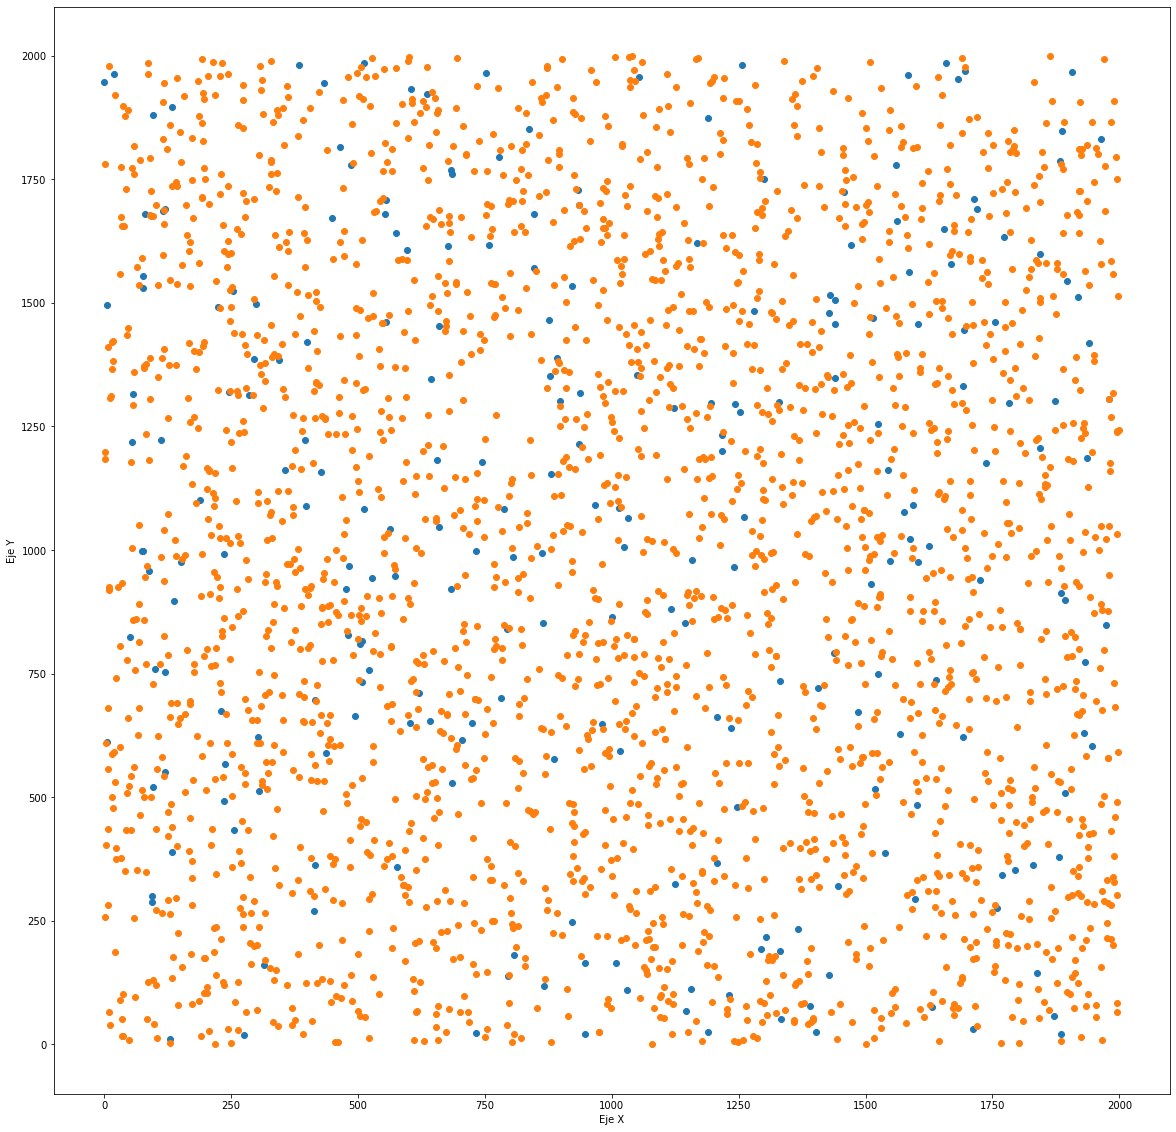

In [87]:
n_city = 2000
G, identificador = create_city(n_city)
generar_puntos(2500, 250, n_city)
almacenes = pd.read_csv("almacenes.csv", header=None).to_numpy()
casas = pd.read_csv("casas.csv", header=None).to_numpy()
casas = casas[1:]
almacenes = almacenes[1:]
plt.subplots(figsize=(20, 20))
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.scatter(almacenes[:, 0], almacenes[:, 1])
plt.scatter(casas[:, 0], casas[:, 1])

## Segmentacion de Grupos

In [88]:
casas_por_almacen = len(casas) / len(almacenes)
casas_por_almacen = int(casas_por_almacen)
n_grupos = len(casas) / casas_por_almacen
aux_casas = list(casas)
grupos = []
grupo = dict()
for almacen in almacenes:
  aux_casas.sort(key=lambda casa: manhattan_distance(almacen, casa))
  grupo["casas"] = aux_casas[:casas_por_almacen]
  grupo["almacen"] = almacen
  aux_casas = aux_casas[casas_por_almacen:]
  grupos.append(grupo.copy())

## Resolucion del problema

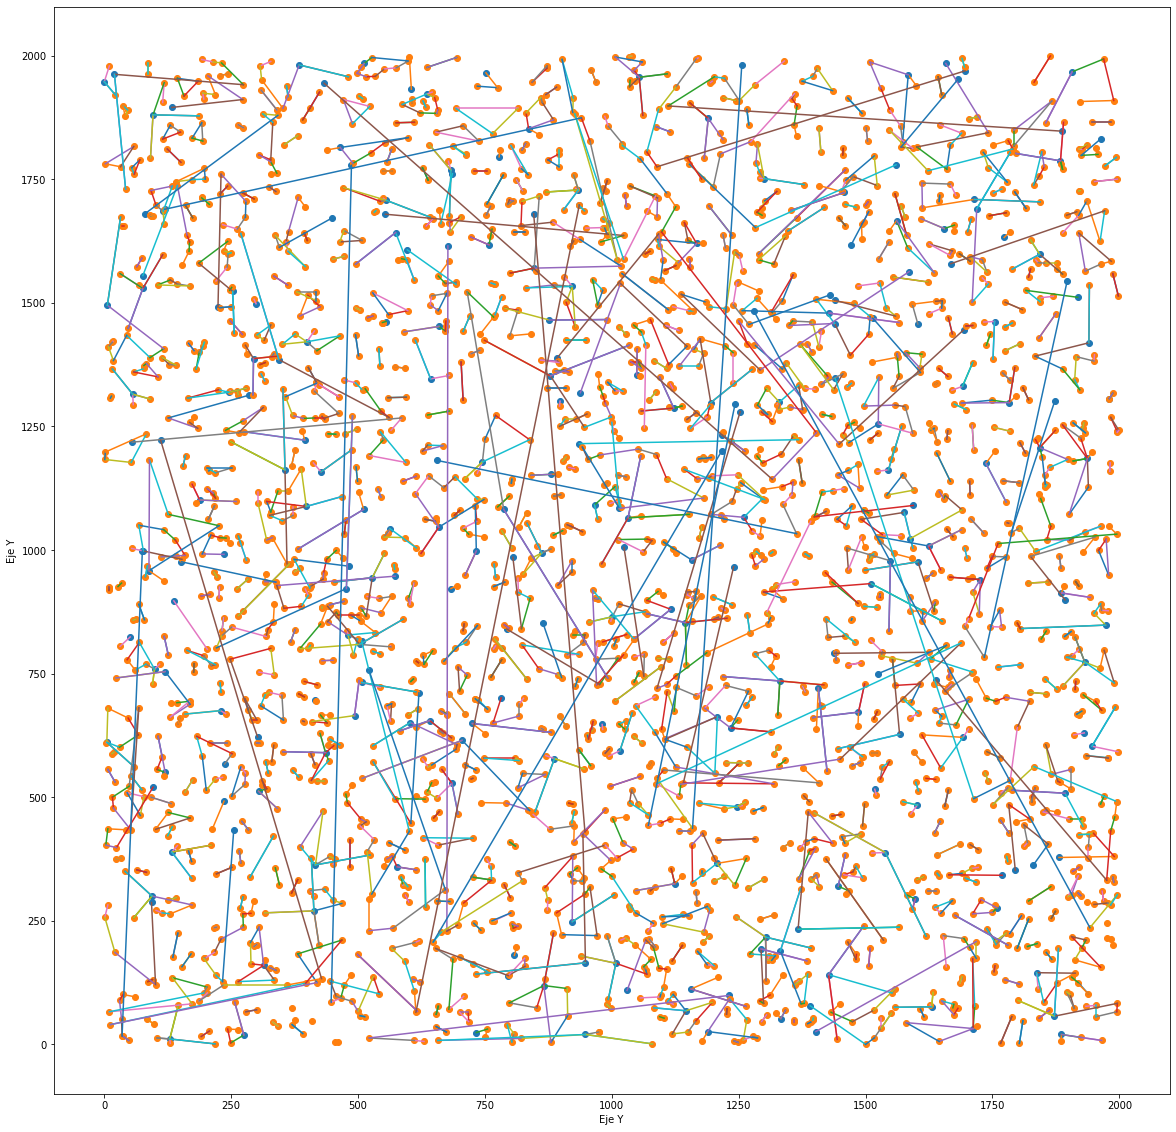

In [159]:
plt.subplots(figsize=(20, 20))
plt.ylabel('Eje Y')
plt.xlabel('Eje Y')
for grupo in grupos:
  procesar_grupo_nearest_neighbor(grupo, plt, n_city)
plt.scatter(almacenes[:, 0], almacenes[:, 1])
plt.scatter(casas[:, 0], casas[:, 1])